In [1]:
#####################################################
# gym.RewardWrapper example
#####################################################

# https://www.gymlibrary.dev/api/wrappers/

In [2]:
####################################################
# Play CartPole-v1 with a reward of 10,000 
#=================================================

import gym
import numpy as np
import matplotlib.pyplot as plt

ENV_NAME = "CartPole-v1"

class RewardIncreased(gym.RewardWrapper):
    def __init__(self, env):
        super().__init__(env)
    
    def reward(self, reward):
        return 10000 * reward

env = gym.make(ENV_NAME)
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>

In [3]:
env = RewardIncreased(env)
env

<RewardIncreased<TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>>

In [4]:
env.reset()
next_state, reward, terminated, truncated, info = env.step(0)
reward # 10000 times its usual reward

10000.0

192000.0

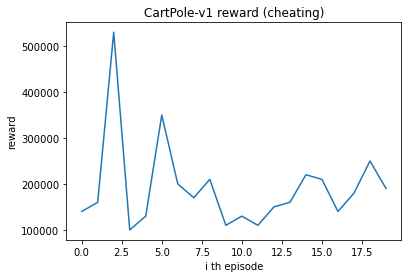

In [5]:
# Play 20 episodes with random actions

num_episodes = 20
rewards = np.zeros(num_episodes)

for i in range(num_episodes):
    env.reset()
    total_reward = 0.0
    terminated = False
    while not terminated:
        action = env.action_space.sample()
        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward 

    rewards[i] = total_reward

fig, ax = plt.subplots()
ax.plot(rewards)
ax.set_title("CartPole-v1 reward (cheating)")
ax.set_xlabel('i th episode')
ax.set_ylabel('reward')

rewards.mean()

In [6]:
#########################################################
# play frozen lake with negative reward -0.1 for each step
#========================================================

import gym
import numpy as np
import matplotlib.pyplot as plt

class MinusRewardImposed(gym.RewardWrapper):
    def __init__(self, env):
        super().__init__(env)
    
    def reward(self, reward):
        return reward - 0.1 # impose negative reward for each step

ENV_NAME = 'FrozenLake-v1'
env = gym.make(ENV_NAME)
env = MinusRewardImposed(env)
env

<MinusRewardImposed<TimeLimit<OrderEnforcing<PassiveEnvChecker<FrozenLakeEnv<FrozenLake-v1>>>>>>

In [7]:
env.reset()
next_state, reward, terminated, truncated, info = env.step(0)
reward # nagative reward -0.1 imposed 

-0.1

-0.3829999999999999

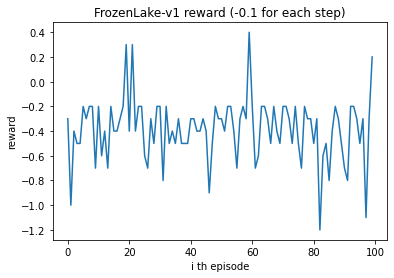

In [8]:
# Play 100 episodes with a policy

num_episodes = 100
rewards = np.zeros(num_episodes)

policy = [2, 2, 1, 2,
          1, 0, 1, 0,
          1, 2, 2, 0,
          0, 1, 1, 0]

for i in range(num_episodes):
    current_state, _ = env.reset()
    total_reward = 0.0
    terminated = False
    action = policy[0]
    while not terminated:
        action = policy[current_state]
        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward 
        current_state = next_state
    rewards[i] = total_reward

fig, ax = plt.subplots()
ax.plot(rewards)
ax.set_title("FrozenLake-v1 reward (-0.1 for each step)")
ax.set_xlabel('i th episode')
ax.set_ylabel('reward')

rewards.mean()

In [9]:
#######################################
# combine two RewardWrappers
#######################################

In [10]:
import gym

ENV_NAME = "CartPole-v1"
env = gym.make(ENV_NAME)
env = RewardIncreased(env)
env = MinusRewardImposed(env)
env

<MinusRewardImposed<RewardIncreased<TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>>>

In [11]:
env.reset()

(array([ 0.04531653,  0.04286681,  0.04091894, -0.03260313], dtype=float32),
 {})

In [12]:
# MinusRewardImposed (+9999.9) <- RewardIncrease(+10000) <- CartPole-v1 (+1) 
next_state, reward, terminated, truncated, info = env.step(0) 
reward

9999.9